In [1]:
import qiskit
from math import pi,sqrt
from qiskit.visualization import plot_bloch_multivector as bloch
from qiskit.visualization import plot_histogram as histo
from qiskit_textbook.tools import random_state,array_to_latex

# We will teleport [sqrt(1/2) sqrt(1/2)]

In [2]:
def entangleqbits(qc,q0,q1):
    qc.h(q0)
    qc.cx(q0,q1)
    return qc

In [3]:
def apply_X_Z_gates(qc,bob,crx,crz):
    qc.x(bob).c_if(crx,1)
    qc.z(bob).c_if(crz,1)
    return qc

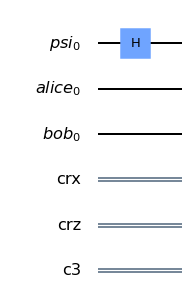

In [4]:
psi = qiskit.QuantumRegister(1,'psi')
alice = qiskit.QuantumRegister(1,'alice')
bob = qiskit.QuantumRegister(1,'bob')
crx = qiskit.ClassicalRegister(1,'crx')
crz = qiskit.ClassicalRegister(1,'crz')
c3 = qiskit.ClassicalRegister(1,'c3')
qc = qiskit.QuantumCircuit(psi,alice,bob,crx,crz,c3)
qc.h(0)
qc.draw('mpl')

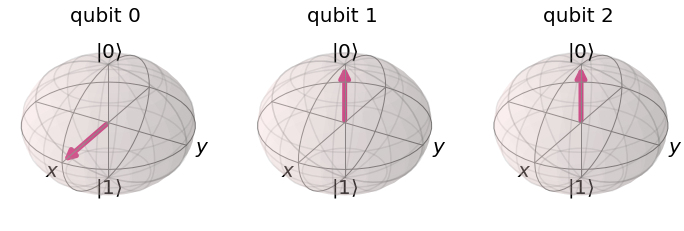

In [5]:
# Initial statevectors

simulator = qiskit.Aer.get_backend('statevector_simulator')
statevectors = qiskit.execute(qc,simulator).result().get_statevector()
bloch(statevectors)

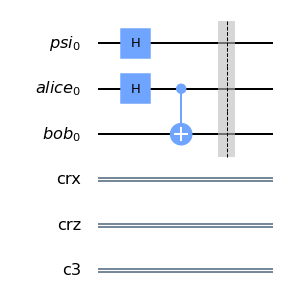

In [6]:
entangleqbits(qc,alice,bob)
qc.barrier()
qc.draw('mpl')

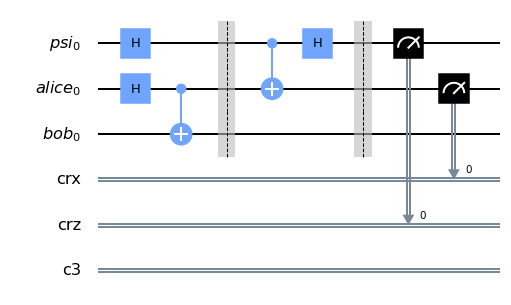

In [7]:
qc.cx(psi,alice)
qc.h(psi)
qc.barrier()
qc.measure(psi,crz)
qc.measure(alice,crx)
qc.draw('mpl')

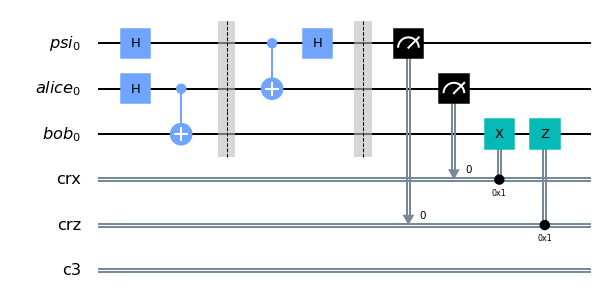

In [8]:
apply_X_Z_gates(qc,bob,crx,crz)
qc.draw('mpl')

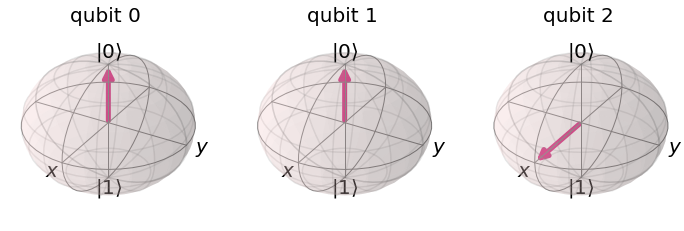

In [9]:
statevectors = qiskit.execute(qc,simulator).result().get_statevector()
bloch(statevectors)

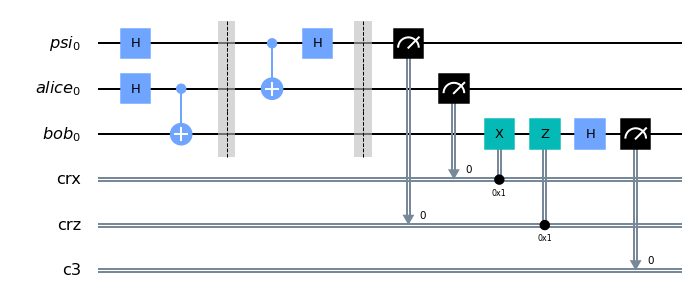

In [10]:
qc.h(bob) # to get definite 0 state as h is inverse of h 
qc.measure(bob,c3)
qc.draw('mpl')

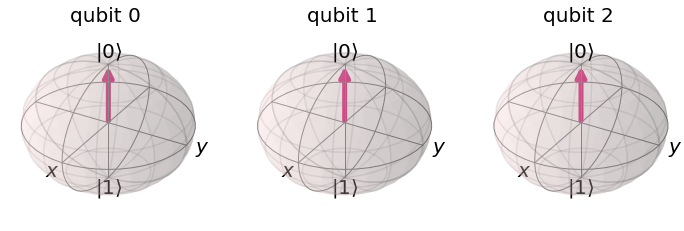

In [11]:
# statevectors after applying H gate on bob's qubit 
statevectors = qiskit.execute(qc,simulator).result().get_statevector()
bloch(statevectors) 

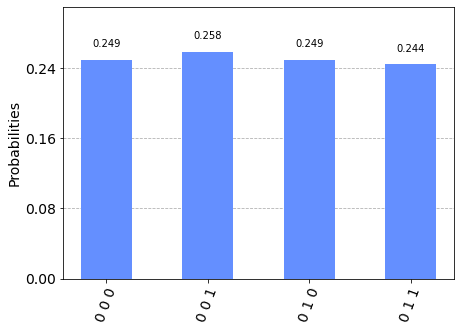

In [12]:

qasmsimulator = qiskit.Aer.get_backend('qasm_simulator')
result = qiskit.execute(qc,qasmsimulator,shots=1000).result()
counts = result.get_counts()
histo(counts)